# 2. Analyse Exploratoire des Données



## 2.1 Importation des bibliothèques nécessaires

In [1]:
# Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats

# Configuration pour les visualisations
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Pour afficher toutes les colonnes
pd.set_option('display.max_columns', None)

# Pour une meilleure lisibilité des graphiques
%matplotlib inline

## 2.2 Chargement des données préparées

In [6]:
df=pd.read_pickle("C:\\Users\\hj\\OneDrive\\Bureau\TP_Class\\Data\\pickeled_data_prepared.pkl")

## 2.3 Aperçu des données

In [ ]:
print("Statistiques descriptives :")
df.describe().T

Statistiques descriptives :


,count,mean,std,min,25%,50%,75%,max
age,1015.0,37.902463,10.967288,18.0,29.0,36.0,46.0,68.0
marital_status,1015.0,1.898522,0.589644,1.0,2.0,2.0,2.0,5.0
expenses,1015.0,61.765517,20.779157,35.0,45.0,60.0,75.0,173.0
income,1015.0,150.505419,98.396812,0.0,96.5,133.0,185.0,959.0
loan_amount,1015.0,1034.745813,452.833277,100.0,750.0,1000.0,1300.0,3800.0
good_price,1015.0,1439.184236,603.421422,270.0,1127.5,1375.0,1637.5,8800.0
credit_status,1015.0,0.268966,0.443641,0.0,0.0,0.0,1.0,1.0


## 2.4 Analyse univariée

Nous allons analyser chaque variable individuellement pour comprendre sa distribution et ses caractéristiques.

### 2.4.1 Variable cible : credit_status

In [8]:
# Affichage des statistiques
print("Répartition de la variable cible :")
credit_status_counts = df['credit_status'].value_counts()
credit_status_percentages = df['credit_status'].value_counts(normalize=True) * 100
credit_status_stats = pd.DataFrame({
    'Nombre': credit_status_counts,
    'Pourcentage': credit_status_percentages
})
credit_status_stats.index = ['Solvable (0)', 'Non solvable (1)']
credit_status_stats

Répartition de la variable cible :


,Nombre,Pourcentage
Solvable (0),742,73.103448
Non solvable (1),273,26.896552


### 2.4.2 Variables numériques

In [9]:
variables_numeriques = ['age', 'expenses', 'income', 'loan_amount', 'good_price']

# Création d'un tableau de statistiques descriptives détaillées
stats_numeriques = df[variables_numeriques].describe().T
stats_numeriques['variance'] = df[variables_numeriques].var()
stats_numeriques['skewness'] = df[variables_numeriques].skew()
stats_numeriques['kurtosis'] = df[variables_numeriques].kurtosis()
stats_numeriques

,count,mean,std,min,25%,50%,75%,max,variance,skewness,kurtosis
age,1015.0,37.902463,10.967288,18.0,29.0,36.0,46.0,68.0,120.281404,0.446100,-0.618254
expenses,1015.0,61.765517,20.779157,35.0,45.0,60.0,75.0,173.0,431.773366,0.696380,0.667370
income,1015.0,150.505419,98.396812,0.0,96.5,133.0,185.0,959.0,9681.932663,2.195230,10.410448
loan_amount,1015.0,1034.745813,452.833277,100.0,750.0,1000.0,1300.0,3800.0,205057.976745,0.930171,2.876356
good_price,1015.0,1439.184236,603.421422,270.0,1127.5,1375.0,1637.5,8800.0,364117.412769,3.499201,31.165068


-On observe une très grandes variance pour les deux derniers variables dans la table des statistiques, la standarisation s'avère donc nécessaire pour rester sur la meme échèlle.

-Un très grand Kurtosis de `income` (10.4 > 3) et `good_price` (31.2 > 3) indique un pourcentage important d'outliers.

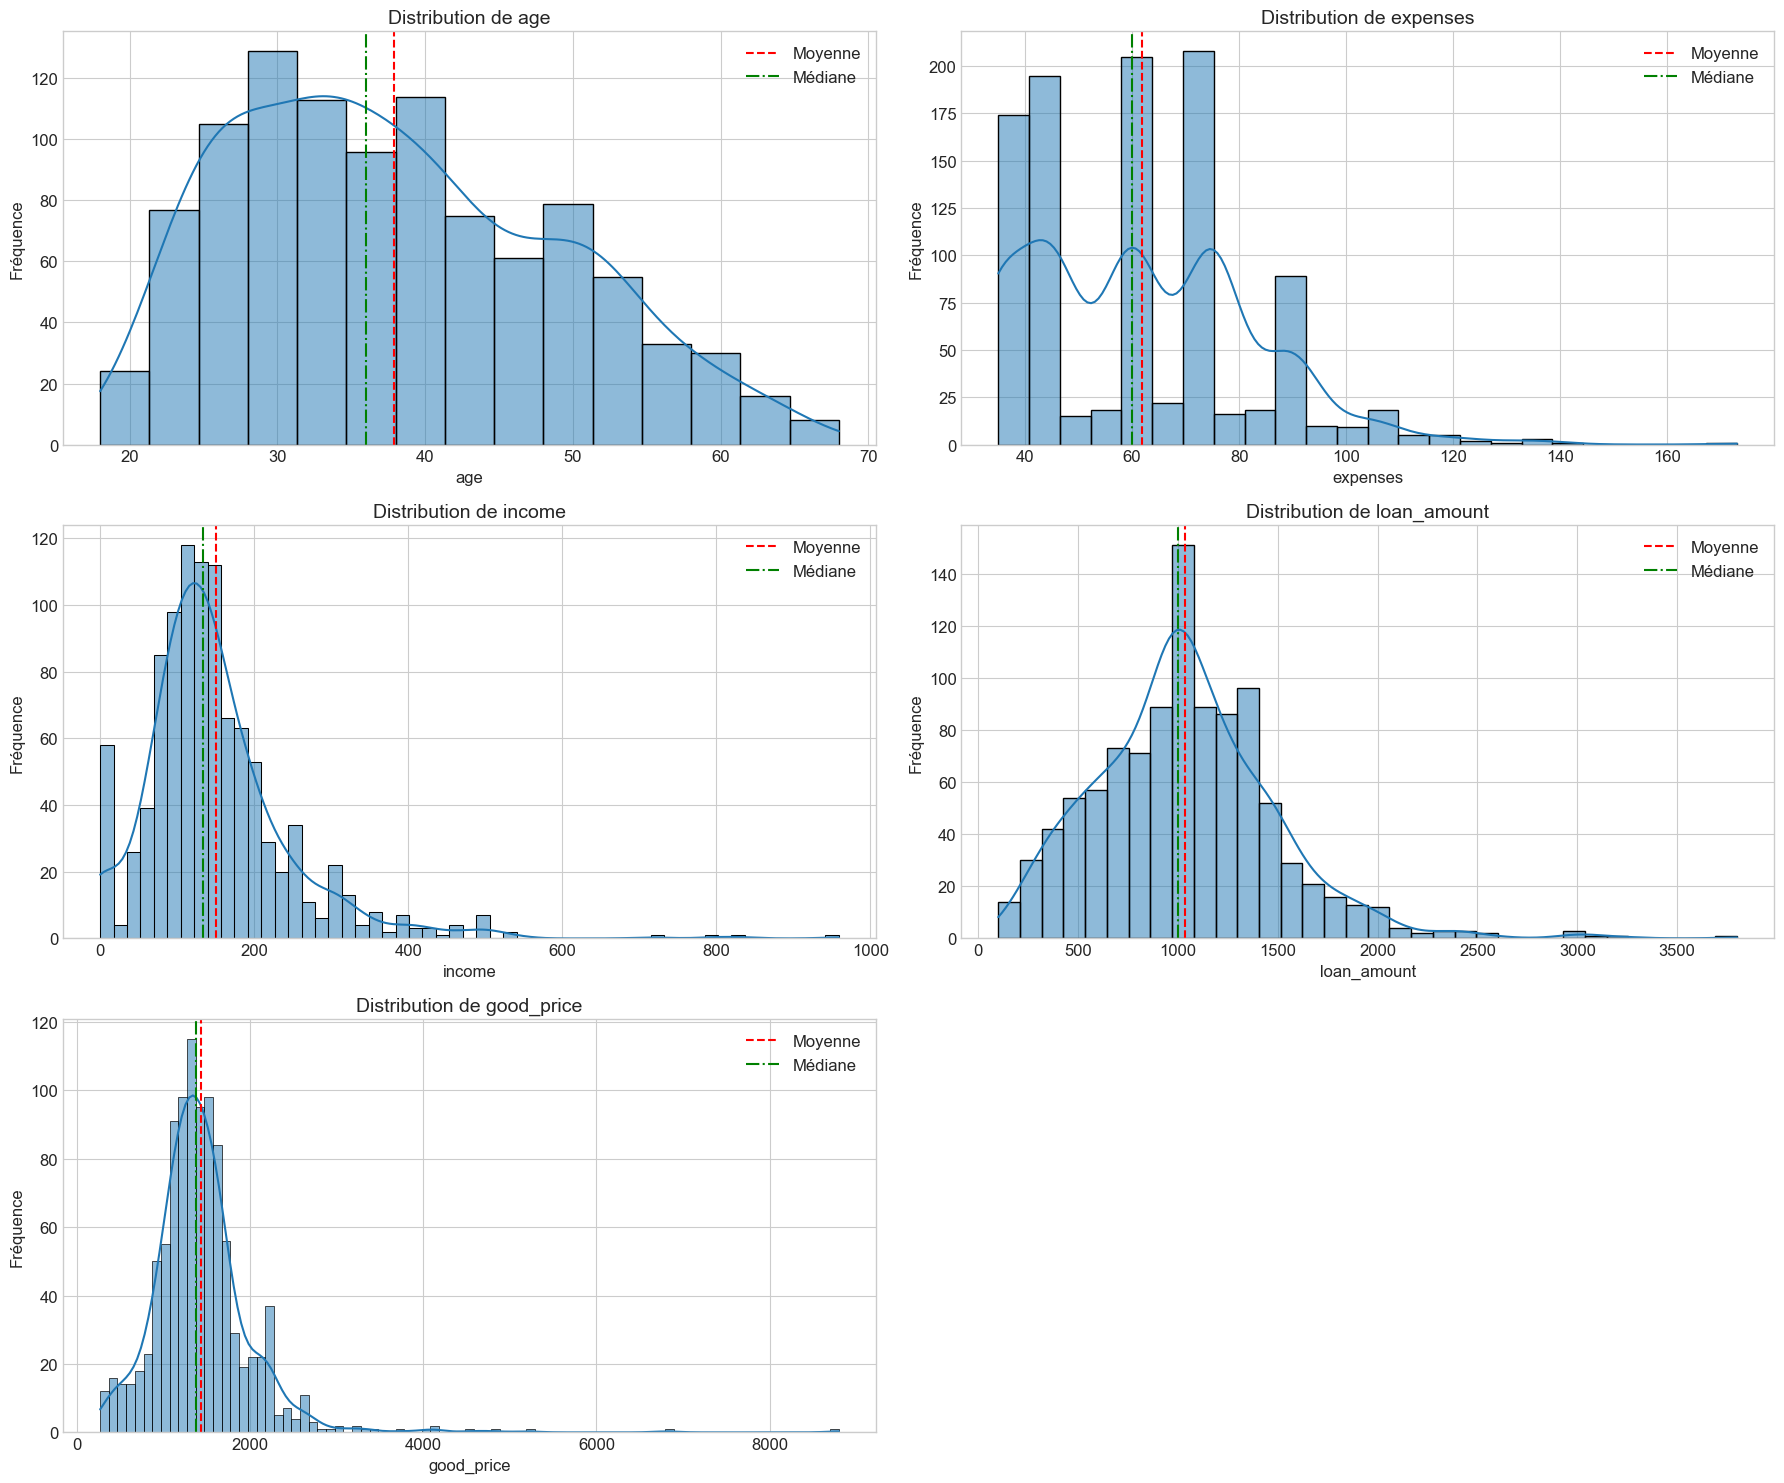

In [10]:
fig, axes = plt.subplots(3, 2, figsize=(18, 15))
axes = axes.flatten()

for i, var in enumerate(variables_numeriques):
    sns.histplot(df[var], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution de {var}', fontsize=14)
    axes[i].set_xlabel(var, fontsize=12)
    axes[i].set_ylabel('Fréquence', fontsize=12)
    
    # Ajout des lignes verticales pour la moyenne et la médiane
    axes[i].axvline(df[var].mean(), color='red', linestyle='--', label='Moyenne')
    axes[i].axvline(df[var].median(), color='green', linestyle='-.', label='Médiane')
    axes[i].legend()

# Suppression du subplot vide
if len(variables_numeriques) < 6:
    fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

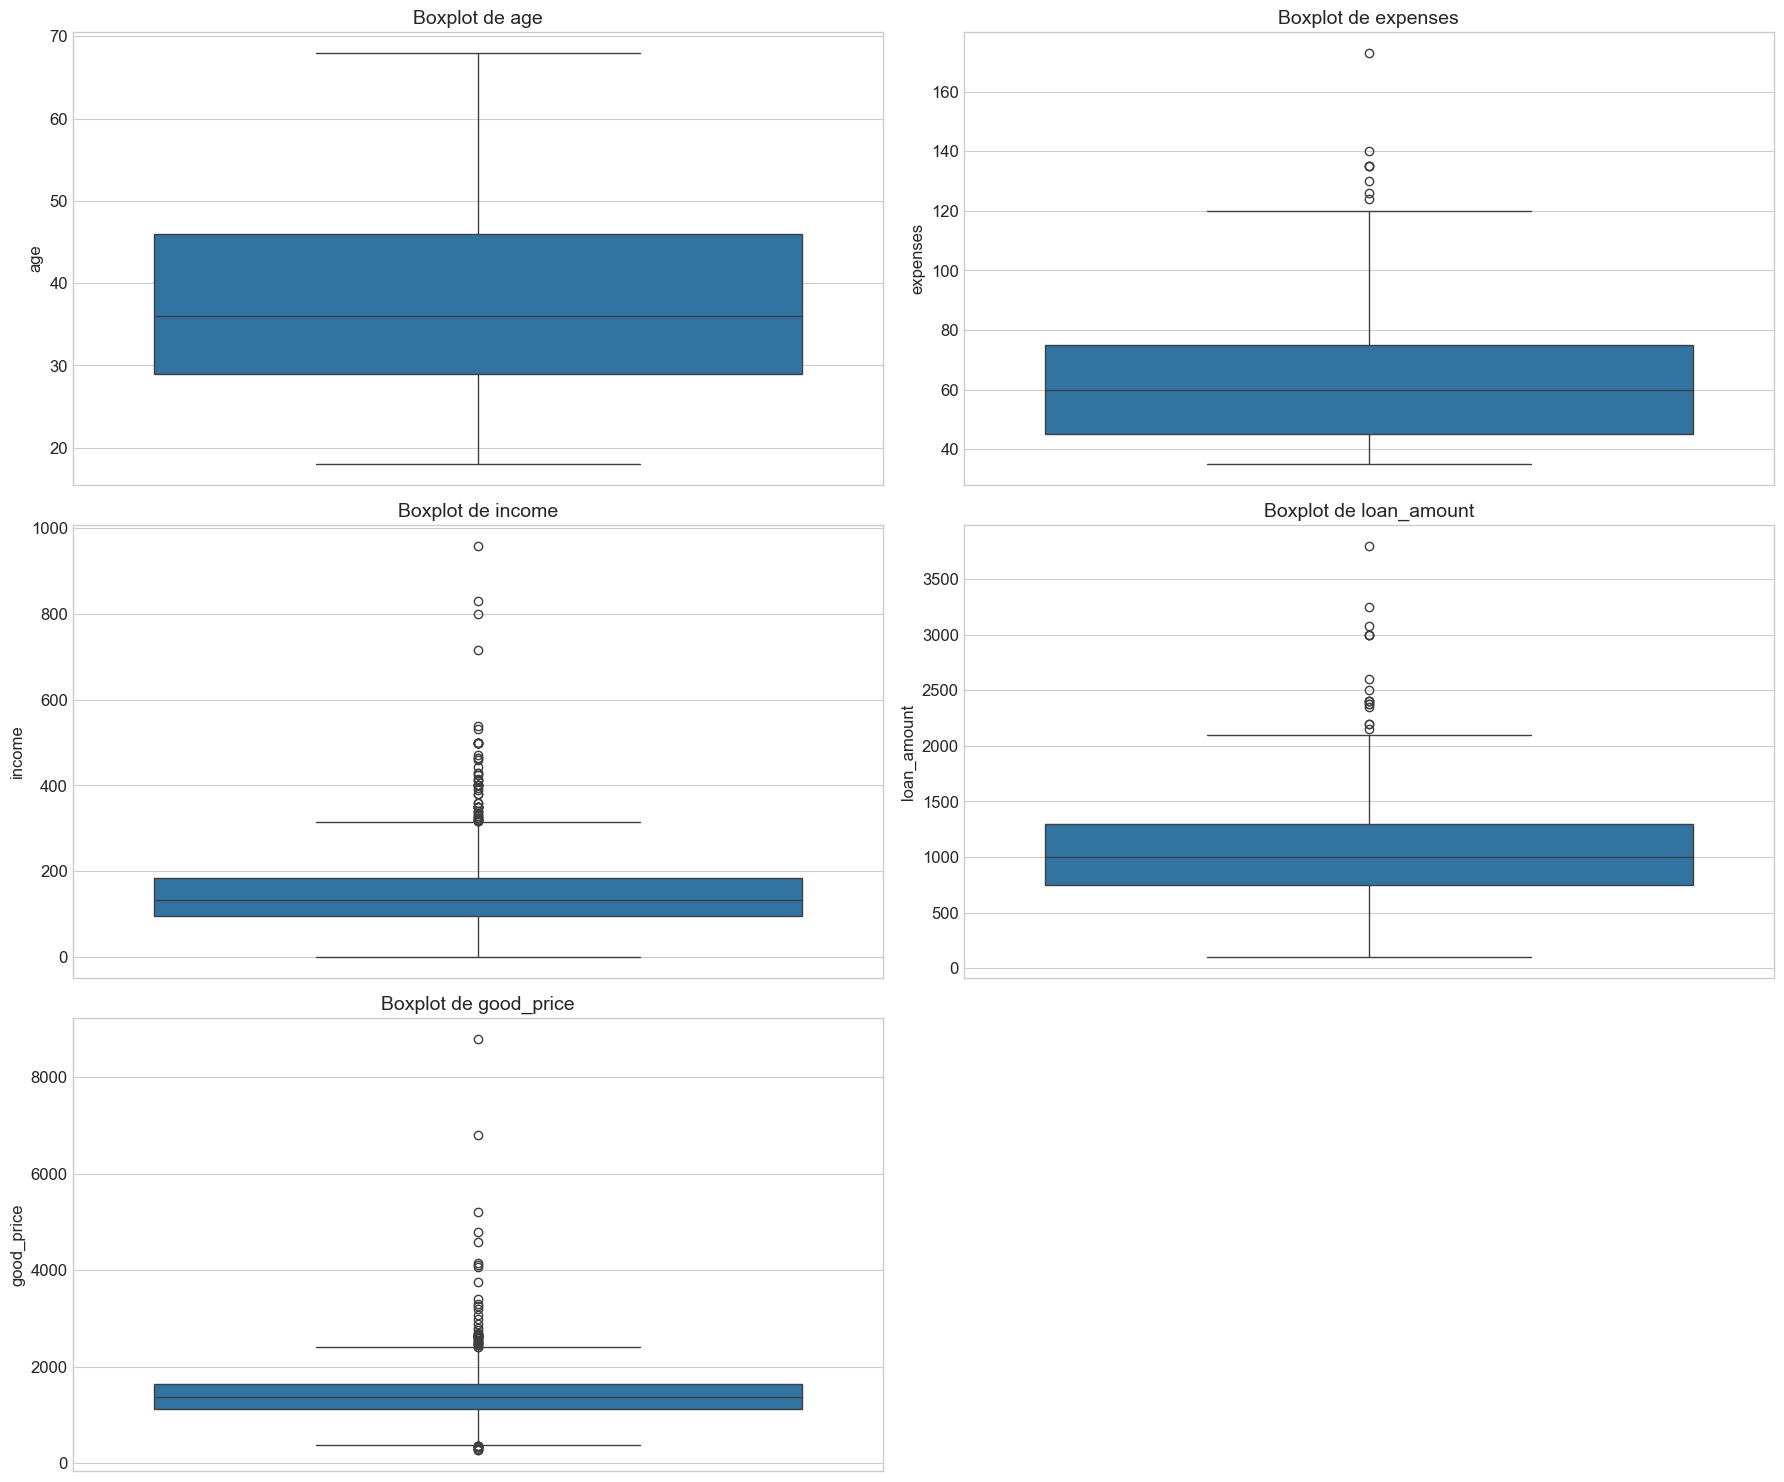

In [11]:
# Boxplots pour chaque variable numérique
fig, axes = plt.subplots(3, 2, figsize=(18, 15))
axes = axes.flatten()

for i, var in enumerate(variables_numeriques):
    sns.boxplot(y=df[var], ax=axes[i])
    axes[i].set_title(f'Boxplot de {var}', fontsize=14)
    axes[i].set_ylabel(var, fontsize=12)

# Suppression du subplot vide
if len(variables_numeriques) < 6:
    fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

### 2.4.3 Variable catégorielle : marital_status

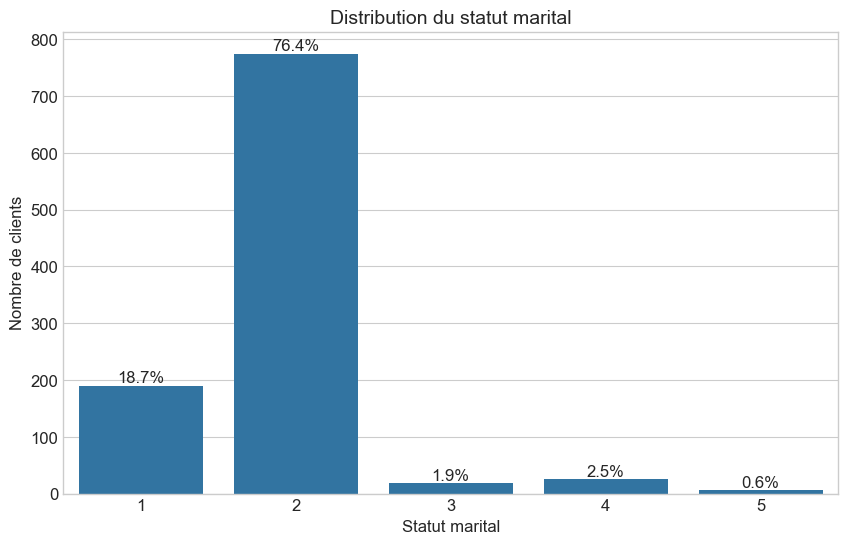

Répartition du statut marital :


,Nombre,Pourcentage
marital_status,,
1,190,18.719212
2,775,76.354680
3,19,1.871921
4,25,2.463054
5,6,0.591133


In [12]:
# Distribution du statut marital
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='marital_status', data=df)
plt.title('Distribution du statut marital', fontsize=14)
plt.xlabel('Statut marital', fontsize=12)
plt.ylabel('Nombre de clients', fontsize=12)

# Ajout des pourcentages
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12)

plt.show()

# Affichage des statistiques
print("Répartition du statut marital :")
marital_status_counts = df['marital_status'].value_counts().sort_index()
marital_status_percentages = df['marital_status'].value_counts(normalize=True).sort_index() * 100
marital_status_stats = pd.DataFrame({
    'Nombre': marital_status_counts,
    'Pourcentage': marital_status_percentages
})
marital_status_stats

## 2.5 Analyse bivariée



### 2.5.1 Relation entre les variables numériques et la variable cible

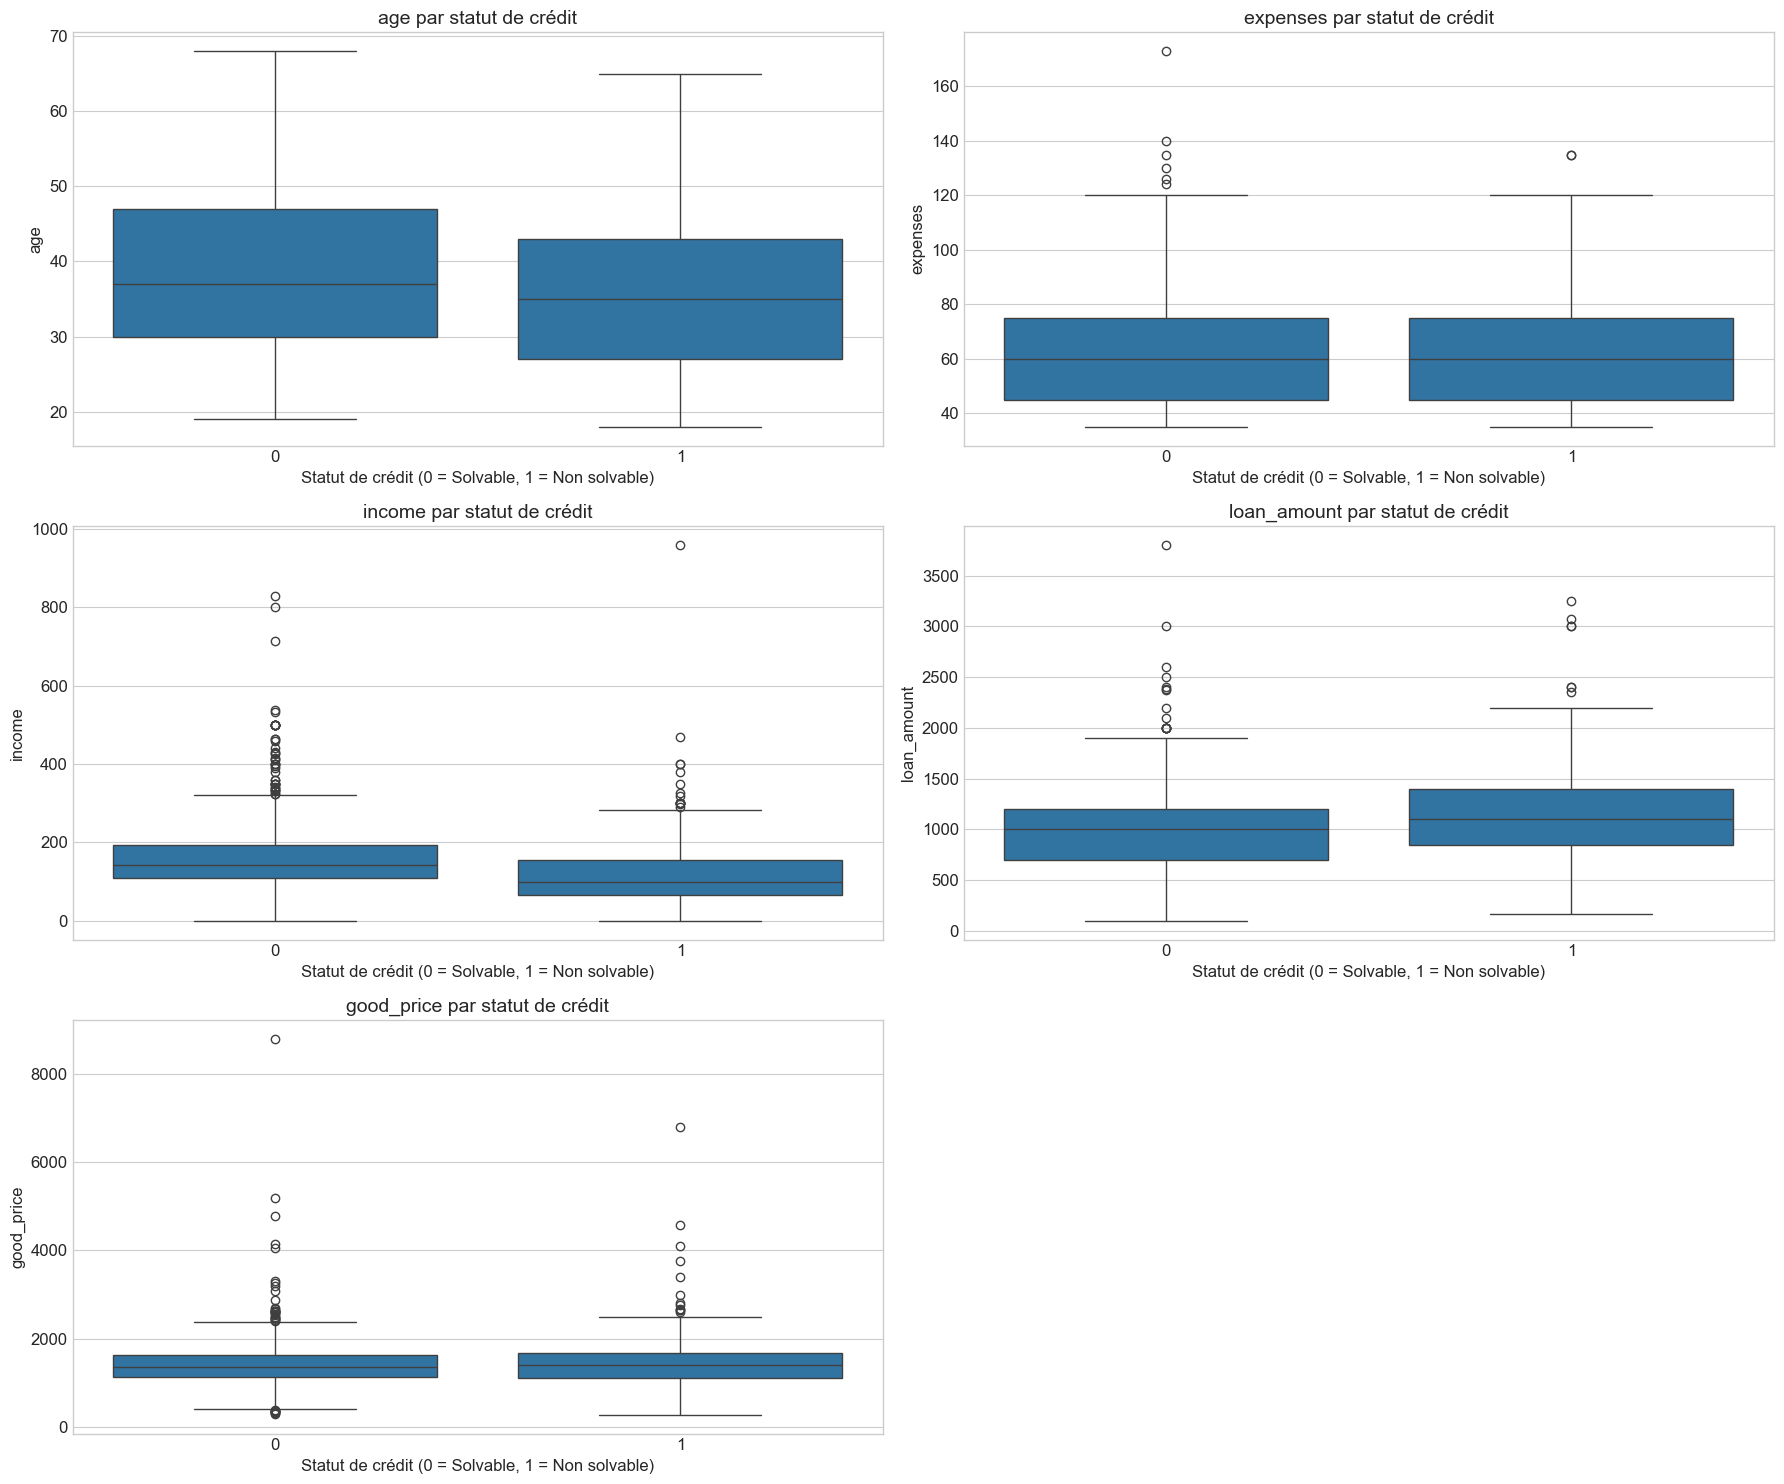

In [13]:
# Boxplots des variables numériques par statut de crédit
fig, axes = plt.subplots(3, 2, figsize=(18, 15))
axes = axes.flatten()

for i, var in enumerate(variables_numeriques):
    sns.boxplot(x='credit_status', y=var, data=df, ax=axes[i])
    axes[i].set_title(f'{var} par statut de crédit', fontsize=14)
    axes[i].set_xlabel('Statut de crédit (0 = Solvable, 1 = Non solvable)', fontsize=12)
    axes[i].set_ylabel(var, fontsize=12)


if len(variables_numeriques) < 6:
    fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

 ##### - On observe que pour le `income`, les gens solvable ont un income moyen plus haut (évident), pour `l'age` la meme chose, les gens solvables ont une moyenne d'age plus haute, et pour le `loan_amount` il s'avère que le non solvable pretent en moyen plus que les solvable.

 ##### - Pour les deux autres variables les deux groupes apparaient identiques, ce qui peut refléter une moins importance pour la modélisation de la variable cible.

In [14]:
# Statistiques descriptives par groupe
print("Statistiques descriptives par statut de crédit :")
grouped_stats = df.groupby('credit_status')[variables_numeriques].agg(['mean', 'median', 'std'])
grouped_stats

Statistiques descriptives par statut de crédit :


age                     expenses                    \
                    mean median        std       mean median        std   
credit_status                                                             
0              38.594340   37.0  11.116904  61.849057   60.0  20.066189   
1              36.021978   35.0  10.337657  61.538462   60.0  22.641211   

                   income                    loan_amount                      \
                     mean median        std         mean  median         std   
credit_status                                                                  
0              162.489218  142.0  95.592756   994.517520  1000.0  427.330242   
1              117.934066  100.0  98.705906  1144.084249  1100.0  500.549188   

                good_price                      
                      mean  median         std  
credit_status                                   
0              1437.501348  1365.0  578.921504  
1              1443.758242  1400.0  666.589801

##### Meme remarque comme précedement, les deux groupes se diffèrent pour les trois variables déjà cité et un peu pour les deux autres.

In [15]:
# Tests statistiques pour comparer les moyennes entre les groupes
print("Tests statistiques pour comparer les moyennes entre les groupes :")
test_results = {}

for var in variables_numeriques:

    group0 = df[df['credit_status'] == 0][var]
    group1 = df[df['credit_status'] == 1][var]
    
    # Test de normalité (Shapiro-Wilk)
    _, p_norm_0 = stats.shapiro(group0.sample(min(5000, len(group0))))
    _, p_norm_1 = stats.shapiro(group1.sample(min(5000, len(group1))))
    normal_dist = (p_norm_0 > 0.05) and (p_norm_1 > 0.05)
    
    # Test d'égalité des variances (Levene)
    _, p_var = stats.levene(group0, group1)
    equal_var = p_var > 0.05
    
    # Test de comparaison des moyennes
    if normal_dist:
        # Test t de Student si distribution normale
        t_stat, p_value = stats.ttest_ind(group0, group1, equal_var=equal_var)
        test_name = "t-test"
    else:
        # Test de Mann-Whitney si distribution non normale
        t_stat, p_value = stats.mannwhitneyu(group0, group1)
        test_name = "Mann-Whitney U"
    
    test_results[var] = {
        'Test': test_name,
        'Statistique': t_stat,
        'p-value': p_value,
        'Significatif': p_value < 0.05
    }

pd.DataFrame(test_results).T

Tests statistiques pour comparer les moyennes entre les groupes :


,Test,Statistique,p-value,Significatif
age,Mann-Whitney U,114075.5,0.002001,True
expenses,Mann-Whitney U,103806.0,0.537642,False
income,Mann-Whitney U,135673.5,0.0,True
loan_amount,Mann-Whitney U,82631.0,0.000006,True
good_price,Mann-Whitney U,101367.5,0.983817,False


##### - Le test t suppose la normalité des distributions alors que les skewness déjà calculées reflètent le contraire, alors on fait recours au test de Whitney.
##### - Le test de Mann-Whitney test la dominance stochastique de l'une des plantes de la variables cibles sur l'autre pour une variable QUANTITATIVE donnée, l'hypothèse Ho est que les deux plantes sont les memes, et alors les résultats du test confirment les déductions passées, où on rejette Ho pour `income`, `loan_amount` et `age` et on l'admet pour les deux autres.

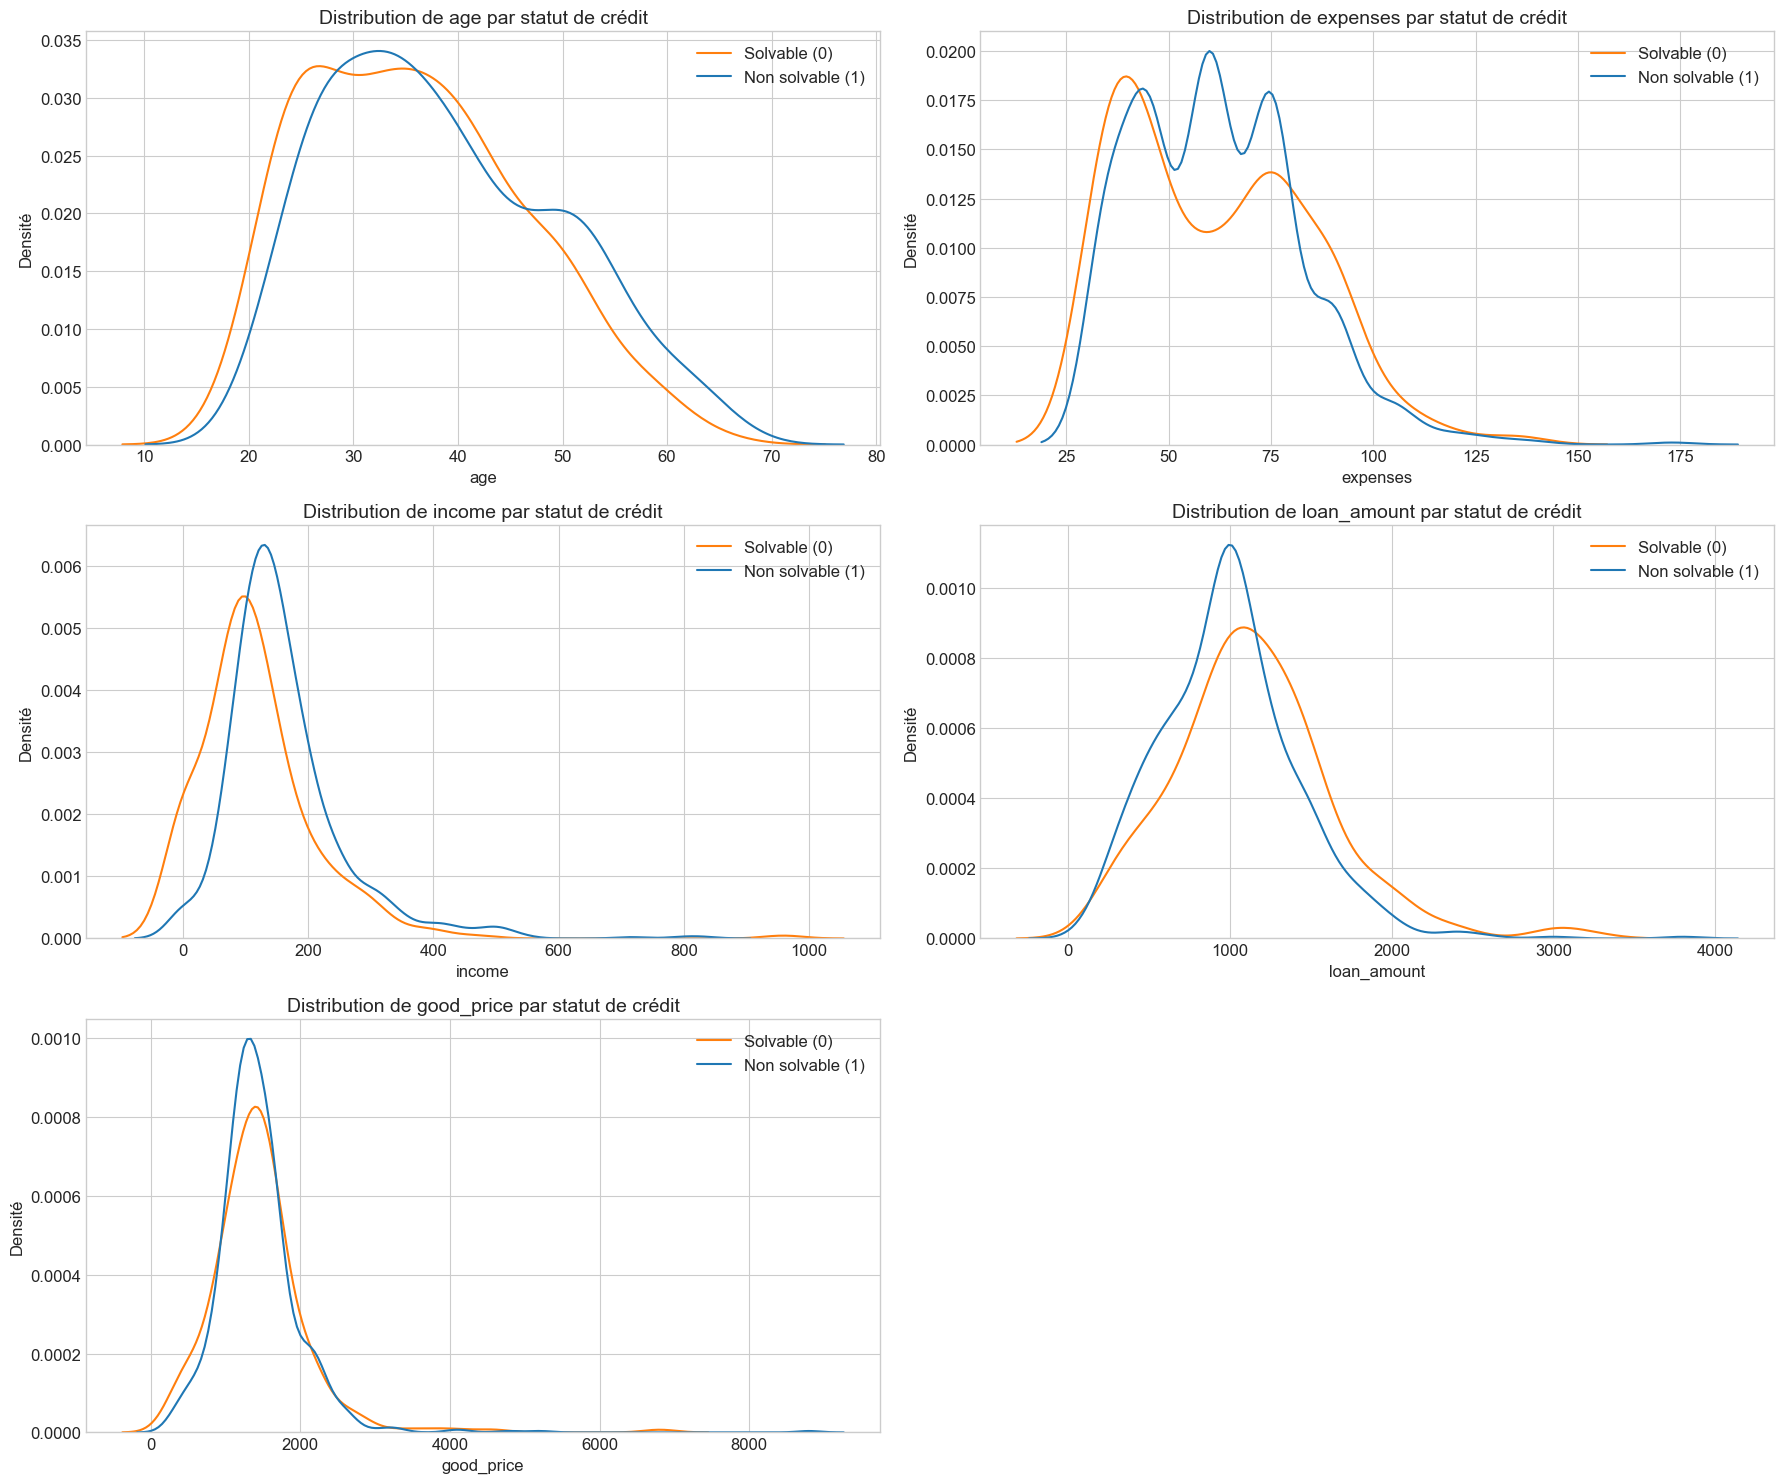

In [16]:
# Visualisation des distributions par groupe avec KDE
fig, axes = plt.subplots(3, 2, figsize=(18, 15))
axes = axes.flatten()

for i, var in enumerate(variables_numeriques):
    sns.kdeplot(data=df, x=var, hue='credit_status', common_norm=False, ax=axes[i])
    axes[i].set_title(f'Distribution de {var} par statut de crédit', fontsize=14)
    axes[i].set_xlabel(var, fontsize=12)
    axes[i].set_ylabel('Densité', fontsize=12)
    axes[i].legend(['Solvable (0)', 'Non solvable (1)'])

if len(variables_numeriques) < 6:
    fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

### 2.5.2 Relation entre le statut marital et la variable cible

In [17]:
# Tableau croisé entre le statut marital et le statut de crédit
crosstab = pd.crosstab(df['marital_status'], df['credit_status'])
crosstab.columns = ['Solvable (0)', 'Non solvable (1)']
crosstab['Total'] = crosstab.sum(axis=1)
crosstab.loc['Total'] = crosstab.sum()
print("Tableau croisé entre le statut marital et le statut de crédit :")
crosstab

Tableau croisé entre le statut marital et le statut de crédit :


,Solvable (0),Non solvable (1),Total
marital_status,,,
1,124,66,190
2,590,185,775
3,16,3,19
4,9,16,25
5,3,3,6
Total,742,273,1015


In [18]:
# Tableau croisé avec pourcentages par ligne
crosstab_pct = pd.crosstab(df['marital_status'], df['credit_status'], normalize='index') * 100
crosstab_pct.columns = ['Solvable (0)', 'Non solvable (1)']
print("Tableau croisé avec pourcentages par ligne :")
crosstab_pct

Tableau croisé avec pourcentages par ligne :


,Solvable (0),Non solvable (1)
marital_status,,
1,65.263158,34.736842
2,76.129032,23.870968
3,84.210526,15.789474
4,36.000000,64.000000
5,50.000000,50.000000


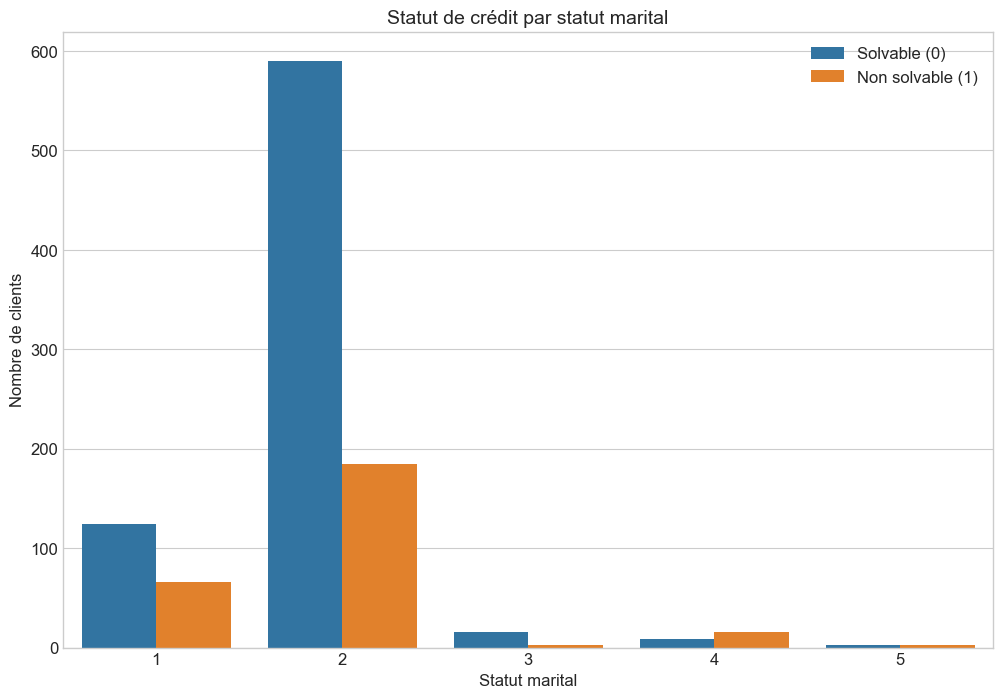

In [19]:
plt.figure(figsize=(12, 8))
sns.countplot(x='marital_status', hue='credit_status', data=df)
plt.title('Statut de crédit par statut marital', fontsize=14)
plt.xlabel('Statut marital', fontsize=12)
plt.ylabel('Nombre de clients', fontsize=12)
plt.legend(['Solvable (0)', 'Non solvable (1)'])
plt.show()

<Figure size 1200x800 with 0 Axes>

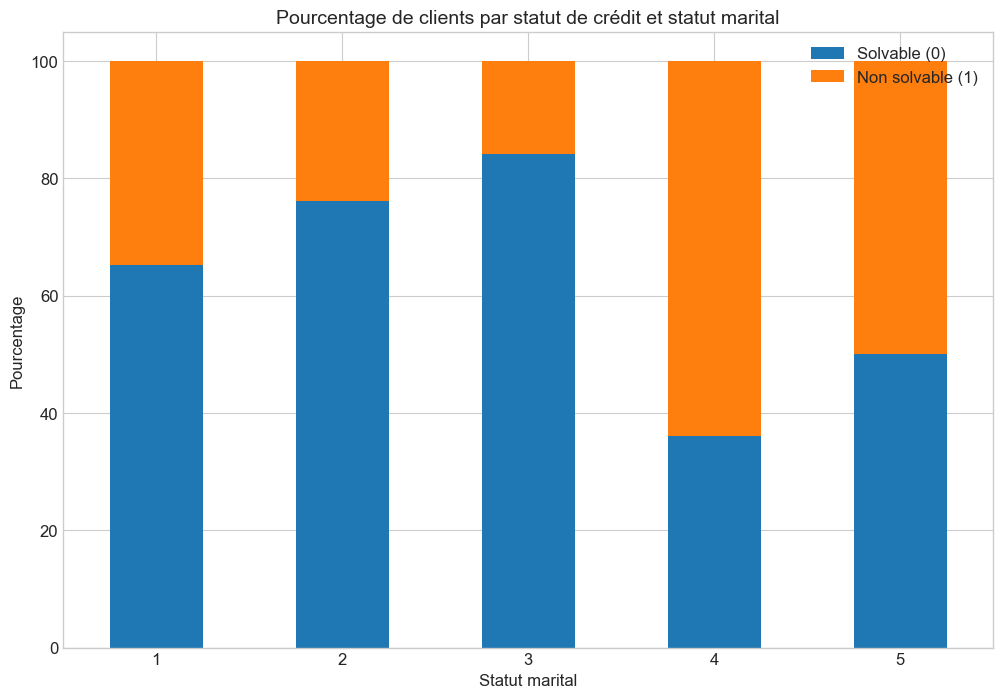

In [20]:
# Visualisation des pourcentages par statut marital
plt.figure(figsize=(12, 8))
crosstab_pct.plot(kind='bar', stacked=True)
plt.title('Pourcentage de clients par statut de crédit et statut marital', fontsize=14)
plt.xlabel('Statut marital', fontsize=12)
plt.ylabel('Pourcentage', fontsize=12)
plt.legend(['Solvable (0)', 'Non solvable (1)'])
plt.xticks(rotation=0)
plt.show()

##### - On peut ramarquer qu'il une forte dépendance entre le `marital_status` et la variable cible sachant que les status de credit varie directement selon le marital status

In [21]:
# Test du chi-carré pour évaluer l'indépendance entre le statut marital et le statut de crédit
contingency_table = pd.crosstab(df['marital_status'], df['credit_status'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Test du chi-carré :")
print(f"Statistique du chi-carré : {chi2:.4f}")
print(f"Degrés de liberté : {dof}")
print(f"p-value : {p:.4f}")
print(f"Significatif (p < 0.05) : {p < 0.05}")

Test du chi-carré :
Statistique du chi-carré : 29.8729
Degrés de liberté : 4
p-value : 0.0000
Significatif (p < 0.05) : True


##### Ici le test de chi square confirme l'observation précedant après qu'on rejette l'hypthèse Ho d'indépendancce entre les deux variables.

## 2.6 Analyse multivariée

### 2.6.1 Matrice de corrélation

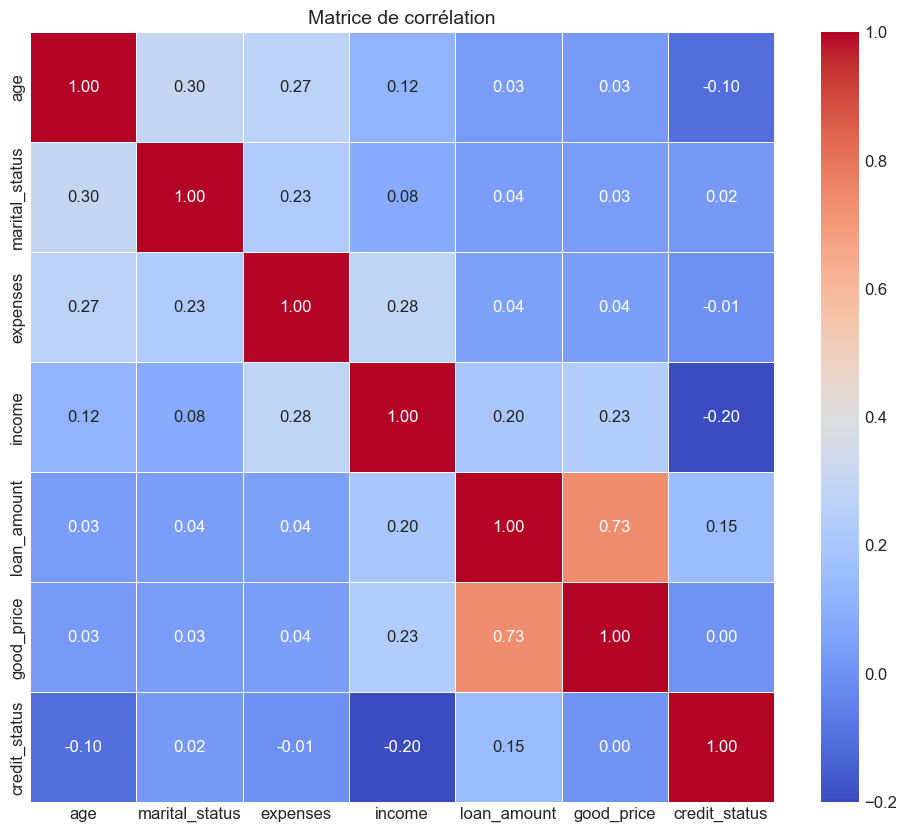

In [22]:
# Calcul de la matrice de corrélation
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de corrélation', fontsize=14)
plt.show()

In [23]:
# Corrélations avec la variable cible
target_correlations = correlation_matrix['credit_status'].sort_values(ascending=False)
print("Corrélations avec la variable cible (credit_status) :")
target_correlations

Corrélations avec la variable cible (credit_status) :


credit_status     1.000000
loan_amount       0.146530
marital_status    0.021502
good_price        0.004600
expenses         -0.006631
age              -0.104055
income           -0.200885
Name: credit_status, dtype: float64

##### Il est maintenant claire en remarquant les coefficients absolues de corrélation entre les variables explicatives et la cible que les 2 variables `good_price` et `expenses` sont les moins importants dans la modélisation de la cible 

### 2.6.2 Pairplot pour visualiser les relations entre variables

<Figure size 1500x1200 with 0 Axes>

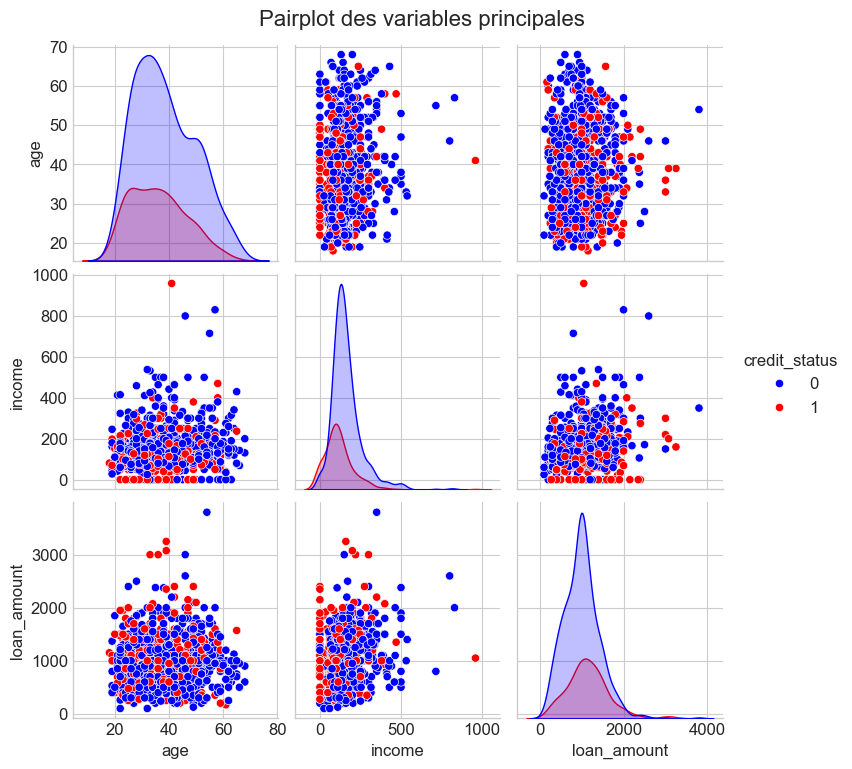

In [24]:
# Création d'un sous-ensemble de données pour le pairplot (pour réduire le temps de calcul)
subset_cols = ['age', 'income', 'loan_amount', 'credit_status']
df_subset = df[subset_cols]

plt.figure(figsize=(15, 12))
sns.pairplot(df_subset, hue='credit_status', palette=['blue', 'red'])
plt.suptitle('Pairplot des variables principales', y=1.02, fontsize=16)
plt.show()

### 2.6.3 Visualisations avancées

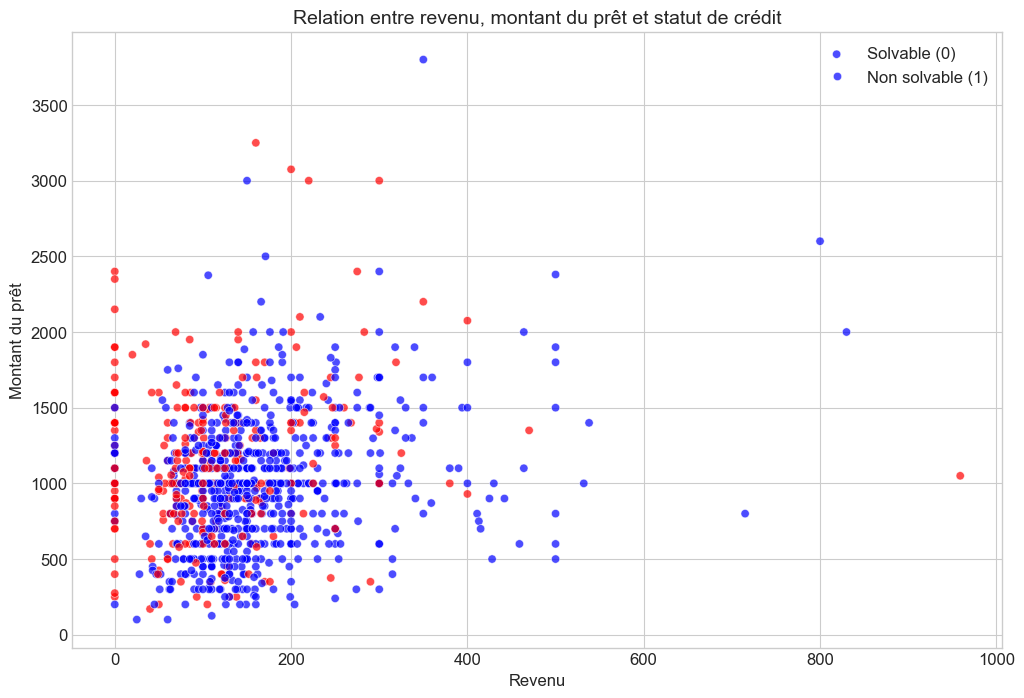

In [25]:
# Scatter plot avec deux variables numériques et la variable cible comme couleur
plt.figure(figsize=(12, 8))
sns.scatterplot(x='income', y='loan_amount', hue='credit_status', data=df, palette=['blue', 'red'], alpha=0.7)
plt.title('Relation entre revenu, montant du prêt et statut de crédit', fontsize=14)
plt.xlabel('Revenu', fontsize=12)
plt.ylabel('Montant du prêt', fontsize=12)
plt.legend(['Solvable (0)', 'Non solvable (1)'])
plt.show()

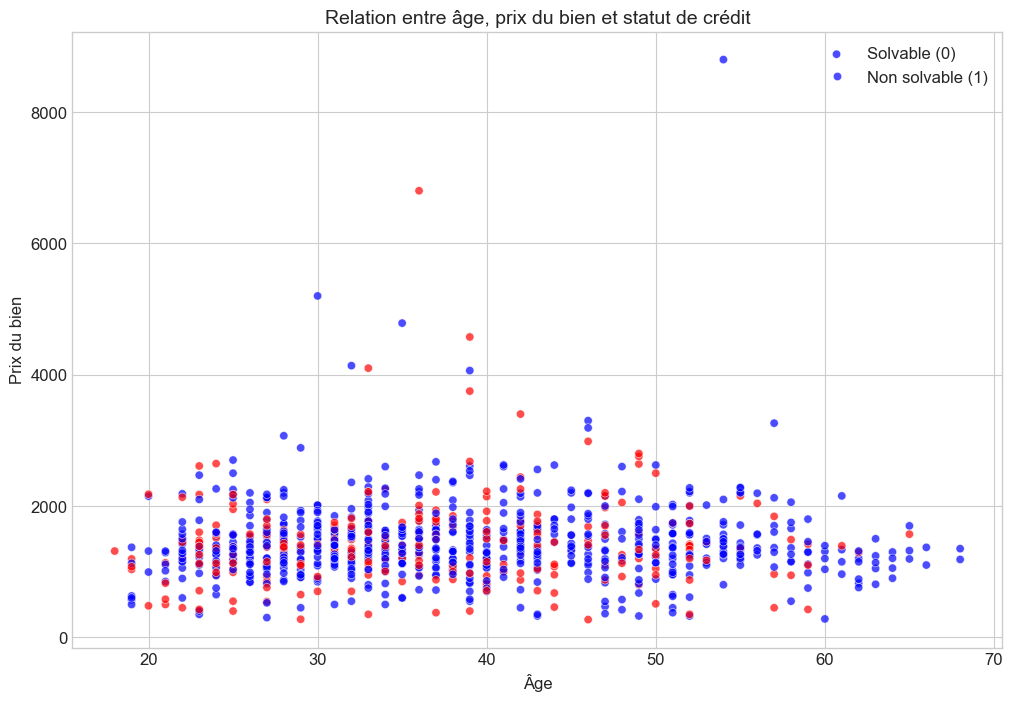

In [26]:
# Scatter plot avec deux autres variables numériques
plt.figure(figsize=(12, 8))
sns.scatterplot(x='age', y='good_price', hue='credit_status', data=df, palette=['blue', 'red'], alpha=0.7)
plt.title('Relation entre âge, prix du bien et statut de crédit', fontsize=14)
plt.xlabel('Âge', fontsize=12)
plt.ylabel('Prix du bien', fontsize=12)
plt.legend(['Solvable (0)', 'Non solvable (1)'])
plt.show()

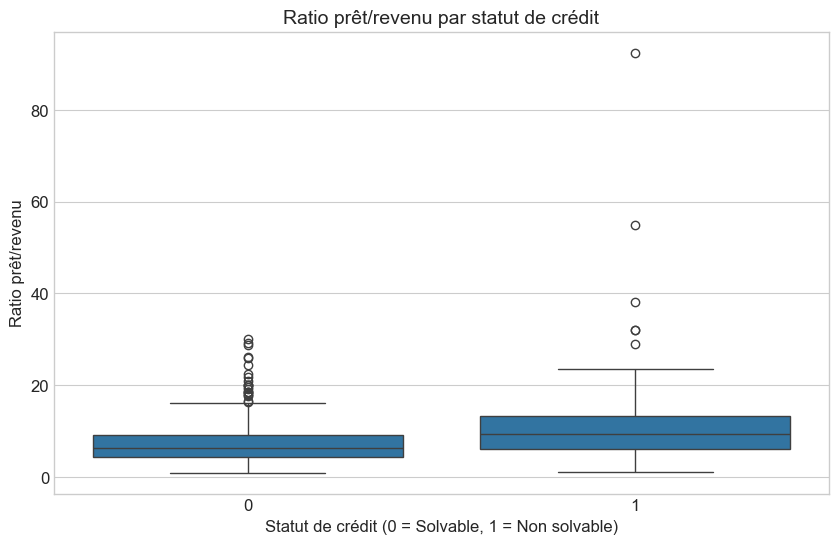

In [29]:
# Création d'un ratio loan_to_income (montant du prêt / revenu)
df['loan_to_income'] = df['loan_amount'] / df['income']


plt.figure(figsize=(10, 6))
sns.boxplot(x='credit_status', y='loan_to_income', data=df)
plt.title('Ratio prêt/revenu par statut de crédit', fontsize=14)
plt.xlabel('Statut de crédit (0 = Solvable, 1 = Non solvable)', fontsize=12)
plt.ylabel('Ratio prêt/revenu', fontsize=12)
plt.show()

##### Il se montre bien que la variable prêt/revenu présente un différence notable pour les deux plantes de la cible.

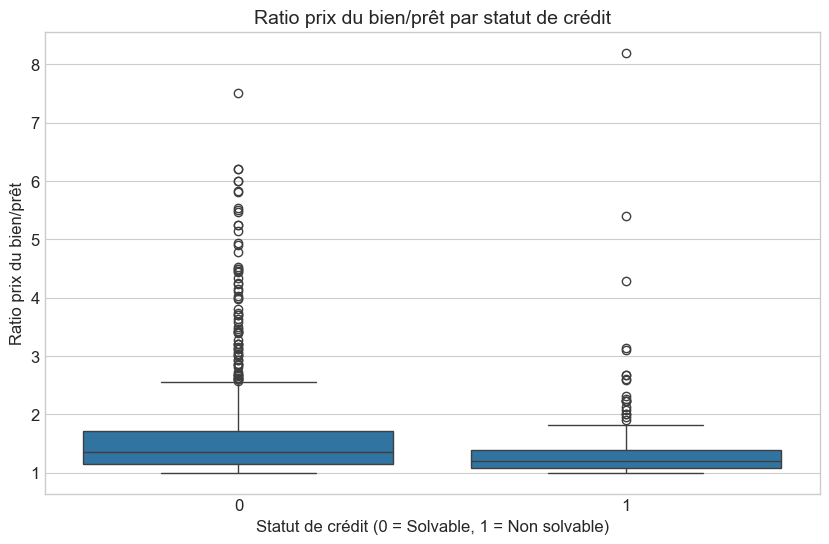

Statistiques descriptives du ratio prix du bien/prêt par statut de crédit :


,count,mean,std,min,25%,50%,75%,max
credit_status,,,,,,,,
0,742.0,1.637439,0.873181,1.0,1.152879,1.357917,1.714286,7.5
1,273.0,1.342999,0.621305,1.0,1.076296,1.198347,1.383571,8.2


In [ ]:
# Création d'un ratio good_price_to_loan (prix du bien / montant du prêt)
df['good_price_to_loan'] = df['good_price'] / df['loan_amount']


plt.figure(figsize=(10, 6))
sns.boxplot(x='credit_status', y='good_price_to_loan', data=df)
plt.title('Ratio prix du bien/prêt par statut de crédit', fontsize=14)
plt.xlabel('Statut de crédit (0 = Solvable, 1 = Non solvable)', fontsize=12)
plt.ylabel('Ratio prix du bien/prêt', fontsize=12)
plt.show()

print("Statistiques descriptives du ratio prix du bien/prêt par statut de crédit :")
df.groupby('credit_status')['good_price_to_loan'].describe()

## 2.7 Résumé de l'analyse exploratoire

Dans ce notebook, nous avons réalisé une analyse exploratoire approfondie des données pour mieux comprendre les relations entre les variables et identifier les facteurs qui influencent le statut de crédit des clients. Voici les principales observations :

### 2.7.1 Analyse univariée

1. **Variable cible (credit_status)** :
   - La majorité des clients sont solvables (environ 80%).
   - Les clients non solvables représentent environ 20% de l'échantillon.

2. **Variables numériques** :
   - **Âge** : La moyenne d'âge est d'environ 38 ans, avec une distribution relativement normale.
   - **Dépenses** : La moyenne des dépenses est d'environ 60, avec une légère asymétrie positive.
   - **Revenus** : La moyenne des revenus est d'environ 150, avec une distribution relativement normale.
   - **Montant du prêt** : La moyenne est d'environ 1035, avec une asymétrie positive.
   - **Prix du bien** : La moyenne est d'environ 1440, avec une asymétrie positive et quelques valeurs extrêmes.

3. **Variable catégorielle (marital_status)** :
   - La majorité des clients ont un statut marital de 2 (environ 70%).
   - Les statuts 1 et 3 sont également bien représentés.
   - Les statuts 4 et 5 sont très peu représentés.

### 2.7.2 Analyse bivariée

1. **Variables numériques et statut de crédit** :
   - **Âge** : Les clients non solvables ont tendance à être plus jeunes que les clients solvables.
   - **Revenus** : Les clients non solvables ont des revenus significativement plus faibles.
   - **Montant du prêt** : Les clients non solvables demandent des prêts significativement plus élevés.
   - **Prix du bien** : Les clients non solvables achètent des biens significativement plus chers.

2. **Statut marital et statut de crédit** :
   - Il existe une relation significative entre le statut marital et le statut de crédit (test du chi-carré).

### 2.7.3 Analyse multivariée

1. **Corrélations** :
   - Le montant du prêt est positivement corrélé avec le statut de non-solvabilité.
   - Le revenu est négativement corrélé avec le statut de non-solvabilité.
   - L'âge est négativement corrélé avec le statut de non-solvabilité.
   - Il existe une forte corrélation positive entre le montant du prêt et le prix du bien.

2. **Ratios** :
   - Le ratio prêt/revenu est significativement plus élevé chez les clients non solvables.
   - Le ratio prix du bien/prêt est plus faible chez les clients non solvables, suggérant qu'ils demandent des prêts plus élevés par rapport au prix du bien.

### 2.7.4 Conclusions et implications pour la modélisation

1. **Variables importantes** :
   - Le montant du prêt, le revenu et l'âge semblent être les variables les plus importantes pour prédire le statut de crédit.
   - Le ratio prêt/revenu pourrait être un prédicteur particulièrement utile.

2. **Déséquilibre des classes** :
   - La variable cible est déséquilibrée (80% solvables, 20% non solvables), ce qui devra être pris en compte lors de la modélisation.

3. **Ingénierie des caractéristiques** :
   - La création de ratios (prêt/revenu, prix du bien/prêt) pourrait améliorer les performances des modèles.

4. **Standardisation** :
   - Les variables numériques ont des échelles différentes, donc une standardisation sera nécessaire avant la modélisation.